In [36]:
# python -m pip install ipykernel
!pip install seaborn

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


In [38]:
data = pd.read_csv("data/stud.csv")
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [39]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [40]:
data.duplicated().sum()

np.int64(0)

In [41]:
print(f"Gender:{data['gender'].unique()}")
print(f"Race Ethnicity: {data['race_ethnicity'].unique()}")
print(f"Test Preparation: {data['test_preparation_course'].unique()}")
print(f"Lunch: {data['lunch'].unique()}")
print(f"Education: {data['parental_level_of_education'].unique()}")


Gender:['female' 'male']
Race Ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Test Preparation: ['none' 'completed']
Lunch: ['standard' 'free/reduced']
Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [44]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [45]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [47]:
n_features = [feature for feature in data.columns if data[feature].dtype != 'O']
c_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print(n_features)
print(c_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [48]:
data['total_score'] = data['math_score']+data['reading_score']+data['writing_score']
data['average'] = data['total_score']/3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
read = data[data['reading_score']==100]['total_score'].count() ## Count works on only column names only so here i take average but we can also take anyone since we not have anu null values
write = data[data['writing_score']==100]['total_score'].count()
math = data[data['math_score']==100]['total_score'].count()
print(f'Number of students with full marks in Maths: {math}')
print(f'Number of students with full marks in Writing: {write}')
print(f'Number of students with full marks in Reading: {read}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [54]:
read_20 = data[data['reading_score']<=20]['total_score'].count() ## Count works on only column names only so here i take average but we can also take anyone since we not have anu null values
write_20 = data[data['writing_score']<=20]['total_score'].count()
math_20 = data[data['math_score']<=20]['total_score'].count()
print(f'Number of students with less than 20 marks in Maths: {math_20}')
print(f'Number of students with less than 20 marks in Writing: {write_20}')
print(f'Number of students with less than 20 marks in Reading: {read_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


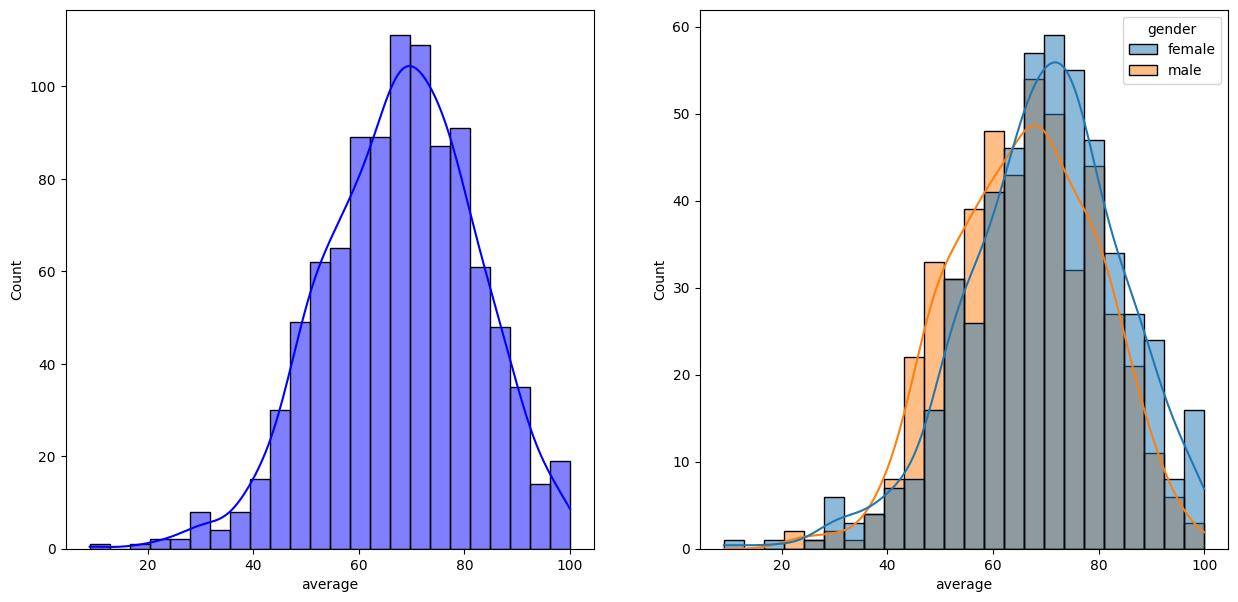

In [55]:
fig,axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='average',color='b',kde=True)
plt.subplot(122)
sns.histplot(data=data, kde=True, x='average', hue='gender')
plt.show()

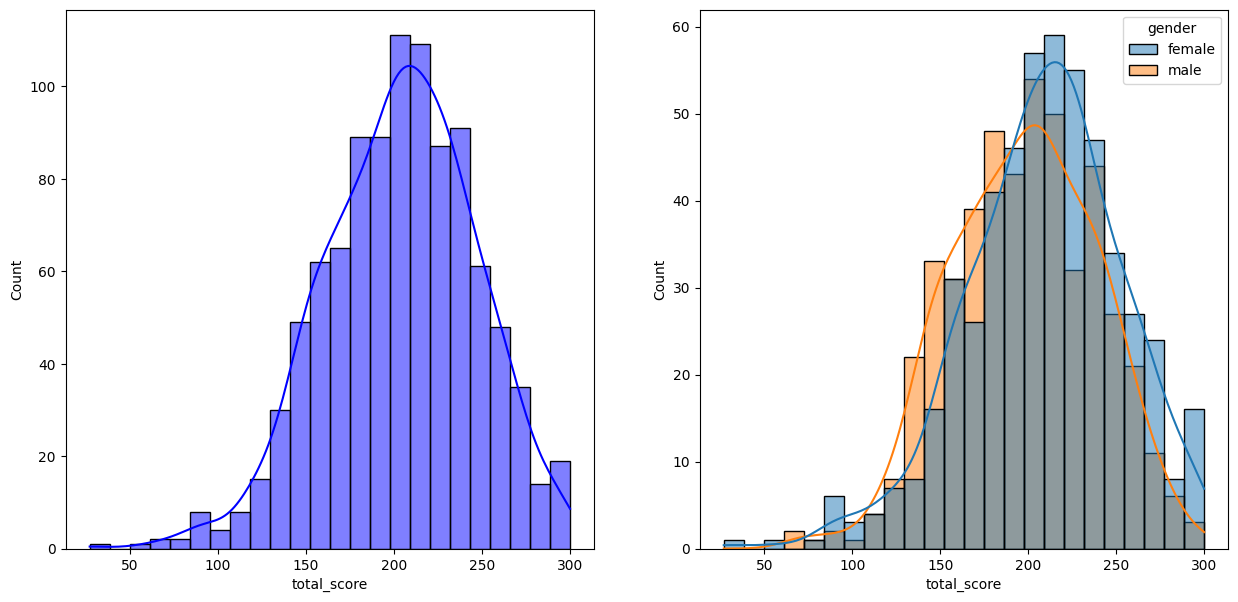

In [58]:
fig,axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='total_score',color='b',kde=True)
plt.subplot(122)
sns.histplot(data=data, kde=True, x='total_score', hue='gender')
plt.show()

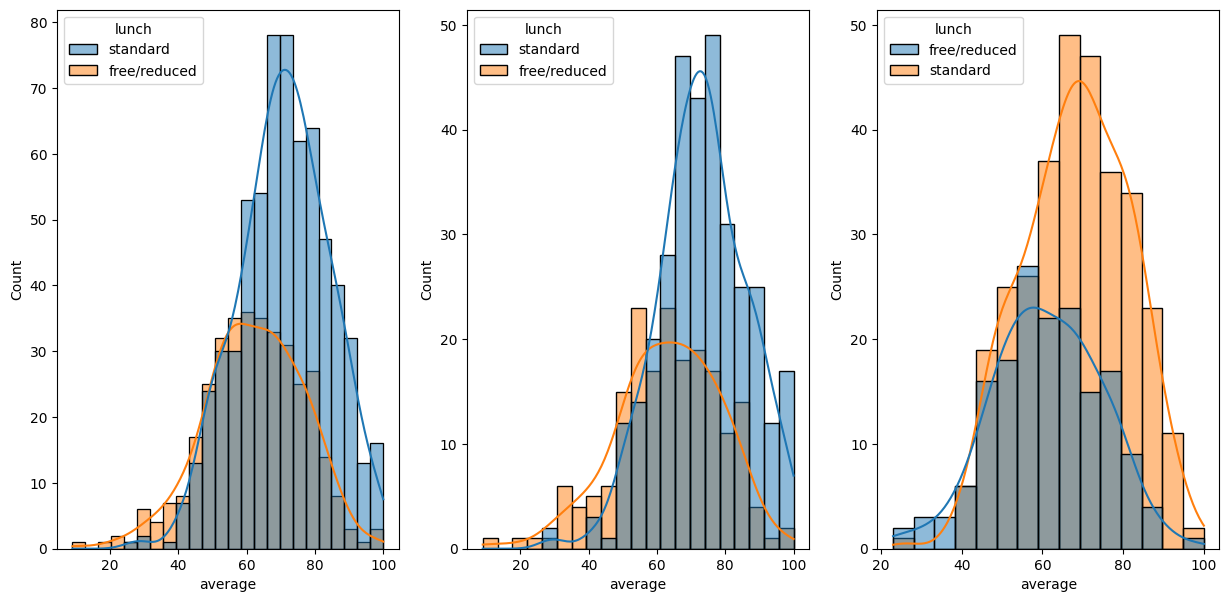

In [62]:
plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=data, x='average', kde=True, color='y', hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data['gender']=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=data[data['gender']=='male'], x='average', kde=True,  hue='lunch')
plt.show()


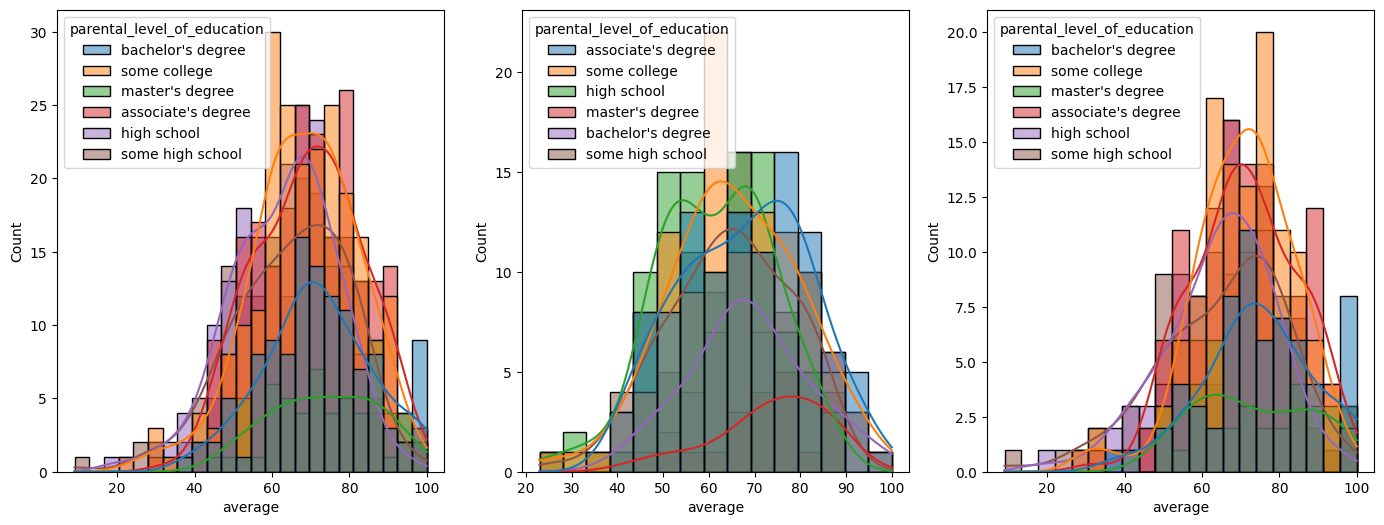

In [67]:
plt.subplots(1,3,figsize=(17,6))
plt.subplot(131)
ax =sns.histplot(data=data,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

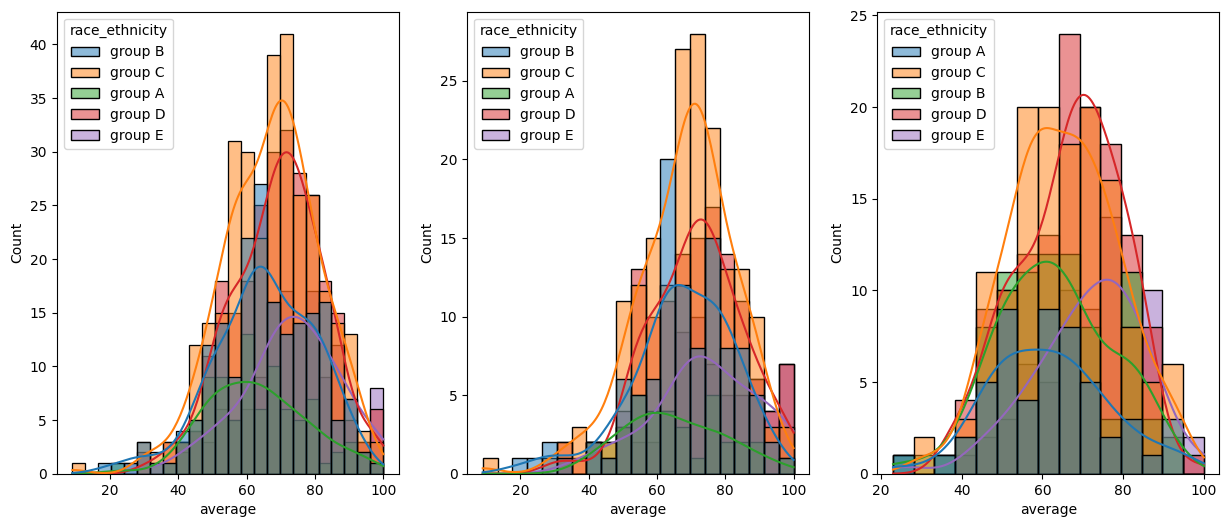

In [68]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(131)
ax =sns.histplot(data=data,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

<Axes: title={'center': 'Writing Scores'}, ylabel='writing_score'>

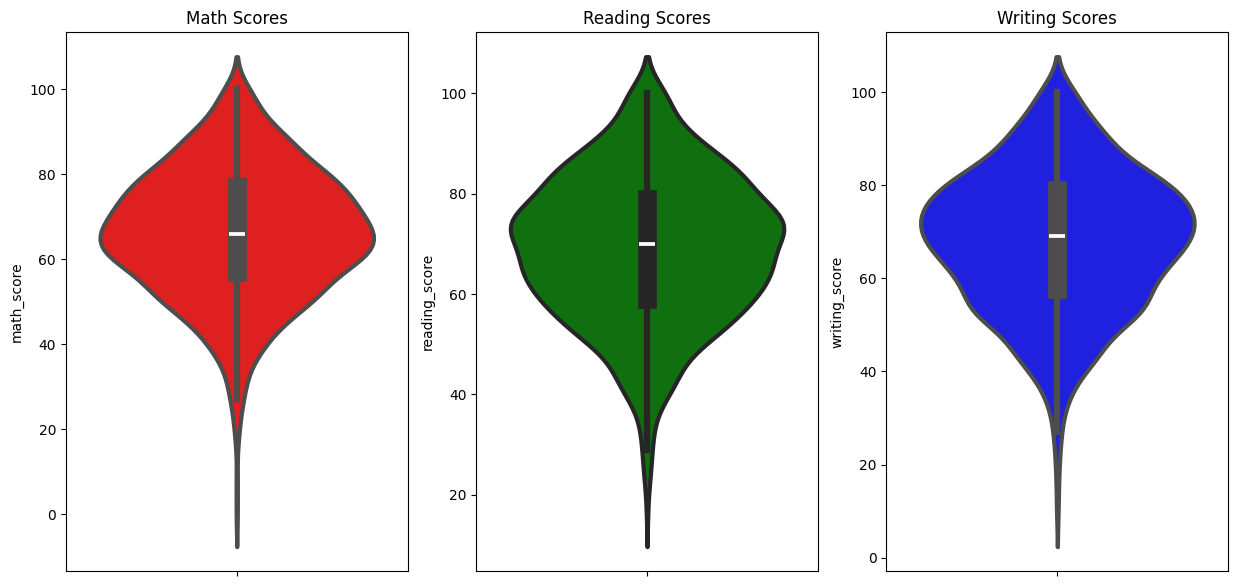

In [70]:
plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=data, color='red', linewidth=3)
plt.subplot(1, 3, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score', data=data, color='green', linewidth=3)
plt.subplot(1, 3, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score', data=data, color='blue', linewidth=3)